In [4]:
from functools import wraps

def taxes(original_function):
    @wraps(original_function)
    def wrapper(*args, **kwargs):
        # do something to the output of original_function
        result = int(original_function(*args, **kwargs) * .7)
        return result
    return wrapper

def transaction_costs(original_function):
    @wraps(original_function)
    def wrapper(*args, **kwargs):
        result = int(original_function(*args, **kwargs) - 10)
        return result
    return wrapper

@transaction_costs
@taxes
def income(principal, daily_return):
    return int(principal * daily_return * .01)

income(20000,2)

270

In [6]:
import pandas as pd

headers = ['adp_100', 'adp_200', 'adp_50', 'adv_21', 'adv_30', 'adv_90', 'ask', 'ask_time', 'asksz', 'basis', 'beta', 'bid', 'bid_time', 'bidsz', 'bidtick', 'chg', 'chg_sign', 'chg_t', 'cl', 'contract_size', 'cusip', 'date', 'datetime', 'days_to_expiration', 'div', 'divexdate', 'divfreq', 'divpaydt', 'dollar_value', 'eps', 'exch', 'exch_desc', 'hi', 'iad', 'idelta', 'igamma', 'imp_volatility', 'incr_vl', 'irho', 'issue_desc', 'itheta', 'ivega', 'last', 'lo', 'name', 'op_delivery', 'op_flag', 'op_style', 'op_subclass', 'openinterest', 'opn', 'opt_val', 'pchg', 'pchg_sign', 'pcls', 'pe', 'phi', 'plo', 'popn', 'pr_adp_100', 'pr_adp_200', 'pr_adp_50', 'pr_date', 'pr_openinterest', 'prbook', 'prchg', 'prem_mult', 'put_call', 'pvol', 'qcond', 'rootsymbol', 'secclass', 'sesn', 'sho', 'strikeprice', 'symbol', 'tcond', 'timestamp', 'tr_num', 'tradetick', 'trend', 'under_cusip', 'undersymbol', 'vl', 'volatility12', 'vwap', 'wk52hi', 'wk52hidate', 'wk52lo', 'wk52lodate', 'xdate', 'xday', 'xmonth', 'xyear', 'yield']
df = pd.read_csv("c:/Users/nicho/Desktop/2018-02-13 ticker.csv", parse_dates=True, names=headers, error_bad_lines=False)

df.shape

df["ask_time"] = df.ask_time.str.replace(":|\.","").astype('int64')
# df["ask_time"] = df.ask_time.astype(int)
df["spread"] = df.bidsz - df.asksz
df["from-avg"] = (df.ask - df.vwap) / df.ask * 100

df['rollin'] = df['bid'].rolling(window=300).mean()
df['difference'] = df['ask'].diff()
df['delta'] = (df['ask'] - df['opn']) / df['opn'] * 100
df['spreadpercent'] = (df.ask - df.bid) / df.bid * 100


df.drop_duplicates(subset=['symbol', 'timestamp'], keep=False)

import numpy as np
table = pd.pivot_table(df, index='timestamp', columns=['symbol'], values='delta')
table.head(4)

c:\python36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


TypeError: unsupported operand type(s) for -: 'float' and 'str'

<IPython.core.display.Javascript object>


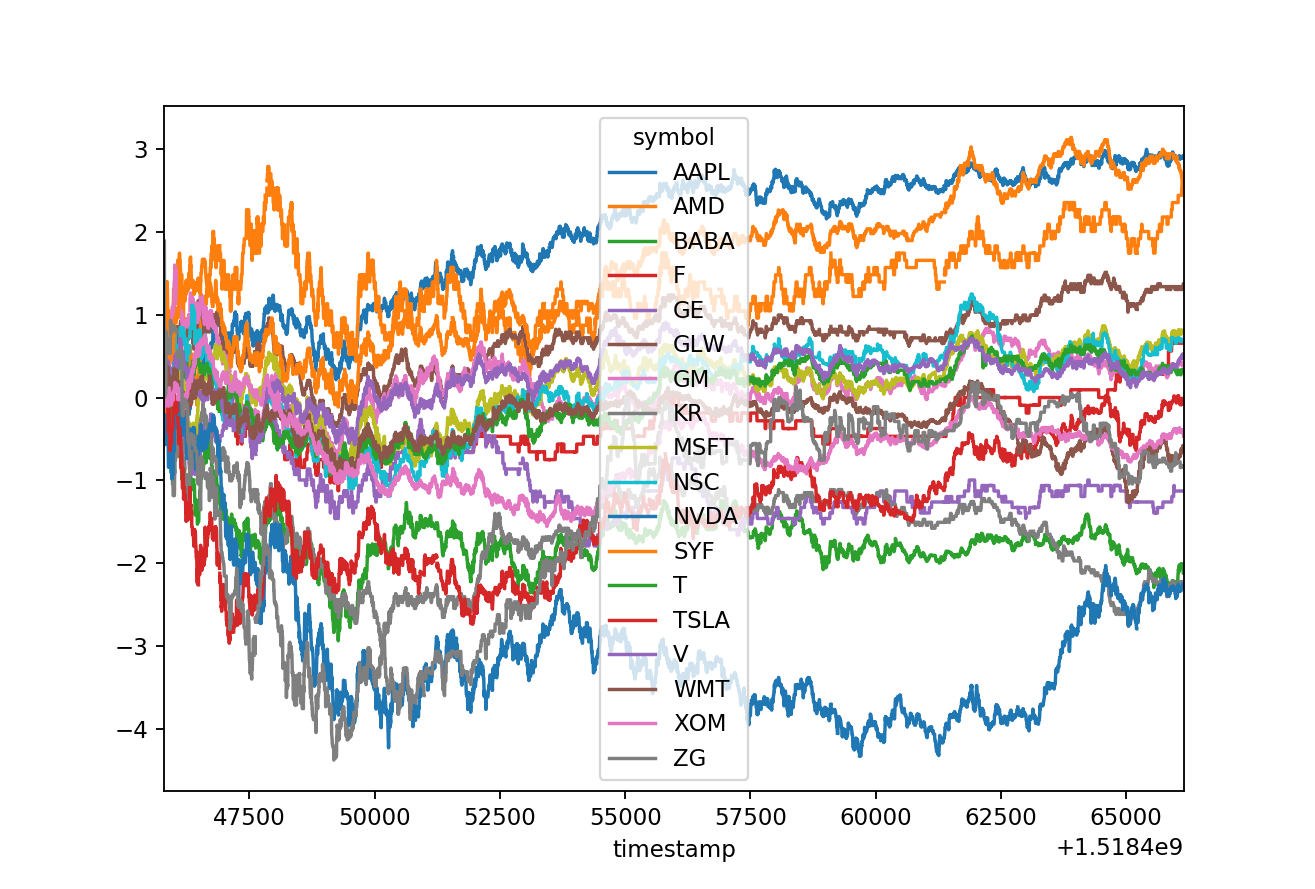

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt

table.plot(legend=True)
plt.show()

In [5]:
# Get the rolling linear regression.
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression



2

# stock-trading
Automated stock trading program using Alpha Vantage and Ally Invest APIs

### TODO:  
*Add Portfolio model*
- position
- basis
- transaction costs
- protection (outstanding sell/cover)
- planned divestiture time

### TODO:  
*Add predictor in Analyst model*
- 

### TODO:  
*Score Keeper model*
- Assess how much better than arbitrary buy/sell strategy for stock basket.
- 